In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def call_price(s0, K, T, r, sig, lambd, muJump, sigJump, N=100):
    '''
        Calculates the price of a call option using the jump diffusion model

        Params:
        s0: initial stock price
        K: strike price
        T: time to maturity
        r: risk-free interest rate
        sig: volatility of the underlying stock
        lambd: intensity of the jump process
        muJump: expected jump size
        sigJump: standard deviation of the jump size
        N: number of steps in the simulation (default 100)

        Return:
        callPrice: price of the call option
    '''
    # Precompute values 
    lambda_p = lambd * (1 + muJump)
    sig_p2 = sig ** 2 + (lambd * (sigJump ** 2 + muJump ** 2))
    d1_base = np.log(s0 / K) + (r - lambd * muJump + 0.5 * sig ** 2) * T

    # Summation of the jump process 
    call_price = 0.0
    for k in range(N + 1):
        # Volatility and drift (adjusted)
        sig_k = np.sqrt(sig_p2 + k * (sigJump ** 2) / T)
        r_k = r - lambd * (muJump + 0.5 * sigJump ** 2) + k * np.log(1 + muJump) / T
        d1 = (d1_base + k * np.log(1+muJump)) / (sig_k * np.sqrt(T))
        d2 = d1 - sig_k * np.sqrt(T)

        # Poisson probability 
        poisson_prob = np.exp(-lambda_p * T) * (lambda_p * T) ** k / np.math.factorial(k)
        call_price += poisson_prob * (s0 * norm.cdf(d1) - K * np.exp(-r_k * T) * norm.cdf(d2))
        
    return call_price
    

Text(0, 0.5, 'Call Option Price')

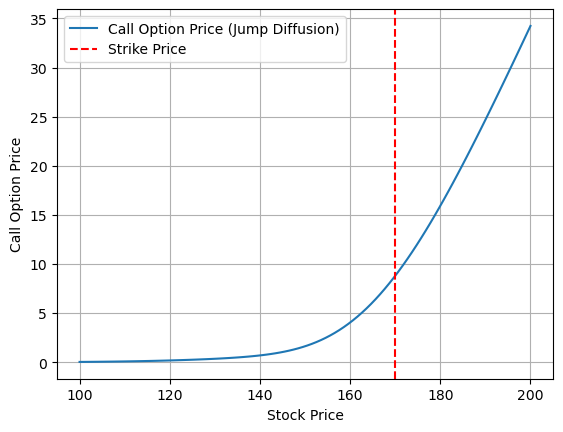

In [9]:
# Testing parameters  
s0 = 150
K = 170
T = 0.5
r = 0.05
sig = 0.1
lambd = 0.1 
muJump = 0.15
sigJ = 0.2 

# Calculate the call price for a range of prices of the underlying stock
price_range = np.linspace(100, 200, 100)
call_prices = [call_price(S, K, T, r, sig, lambd, muJump, sigJ) for S in price_range]

plt.plot(price_range, call_prices, label = 'Call Option Price (Jump Diffusion)')
plt.axvline(x = K, color = 'r', linestyle = '--', label = 'Strike Price')
plt.grid(True)
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Call Option Price')